Kelompok: 6
* Pajar Purnama Sidik - Kaizen
* Regina Aperita Lusiana Harahap - Khasanah Ilmi
* Steven Christ Pinantyo Arwidarasto - Alfatih
* Miranda Tambunan - AphaGo
* Azzahra Agitha Karina - Devalopa

## Import Library dan Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
plt.rcParams['figure.figsize'] = 15, 6            #agar semua plot ukurannya sama
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
data = pd.read_csv('/content/Sunspots.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

   Unnamed: 0        Date  Monthly Mean Total Sunspot Number
0           0  1749-01-31                               96.7
1           1  1749-02-28                              104.3
2           2  1749-03-31                              116.7
3           3  1749-04-30                               92.8
4           4  1749-05-31                              141.7

 Data Types:
Unnamed: 0                             int64
Date                                  object
Monthly Mean Total Sunspot Number    float64
dtype: object


In [ ]:
#Mengubah tanggal menjadi index
con=data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#check datatype of index
data.index

DatetimeIndex(['1749-01-31', '1749-02-28', '1749-03-31', '1749-04-30',
               '1749-05-31', '1749-06-30', '1749-07-31', '1749-08-31',
               '1749-09-30', '1749-10-31',
               ...
               '2020-04-30', '2020-05-31', '2020-06-30', '2020-07-31',
               '2020-08-31', '2020-09-30', '2020-10-31', '2020-11-30',
               '2020-12-31', '2021-01-31'],
              dtype='datetime64[ns]', name='Date', length=3265, freq=None)

In [ ]:
data

,Unnamed: 0,Monthly Mean Total Sunspot Number
Date,,
1749-01-31,0,96.7
1749-02-28,1,104.3
1749-03-31,2,116.7
1749-04-30,3,92.8
1749-05-31,4,141.7
...,...,...
2020-09-30,3260,0.6
2020-10-31,3261,14.4
2020-11-30,3262,34.0


In [ ]:
#convert to time series:
ts = data['Monthly Mean Total Sunspot Number']
ts.head(10)

Date
1749-01-31     96.7
1749-02-28    104.3
1749-03-31    116.7
1749-04-30     92.8
1749-05-31    141.7
1749-06-30    139.2
1749-07-31    158.0
1749-08-31    110.5
1749-09-30    126.5
1749-10-31    125.8
Name: Monthly Mean Total Sunspot Number, dtype: float64

## Ploting data


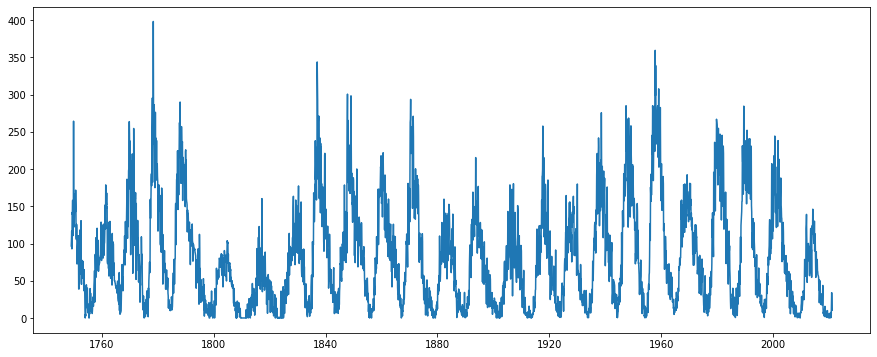

In [ ]:
plt.plot(ts)

## Uji Stasioneritas

Ho : data tidak stasioner

Ha : data stasioner

In [ ]:
#Membuat fungsi untuk uji stasioneritas
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling( window=12).mean()
    rolstd = timeseries.rolling( window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

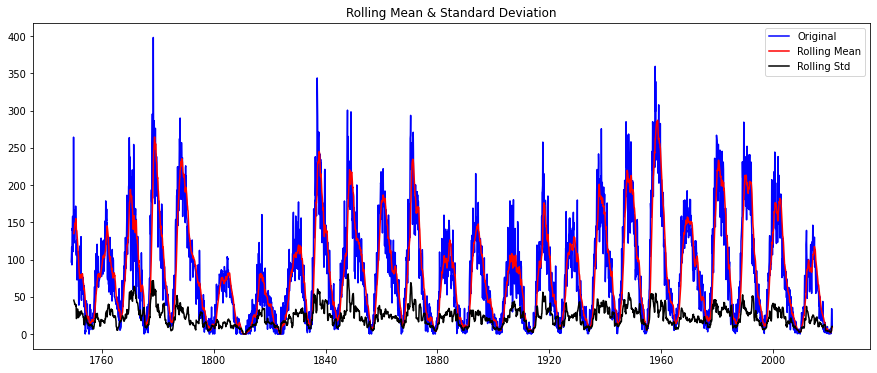

Results of Dickey-Fuller Test:
Test Statistic                -1.049705e+01
p-value                        1.108552e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.236000e+03
Critical Value (1%)           -3.432372e+00
Critical Value (5%)           -2.862434e+00
Critical Value (10%)          -2.567246e+00
dtype: float64


In [ ]:
#Menguji data
test_stationarity(ts)

Terlihat meansnya terus berubah sehingga tidak bisa disebut stasioner. Menurut uji Dickey-Fuller, p-value = 1.108552e-18 < 0.05, sehingga menolak Ho, data stasioner. Maka tidak dibutuhkan transformasi atau differencing

## SKIP

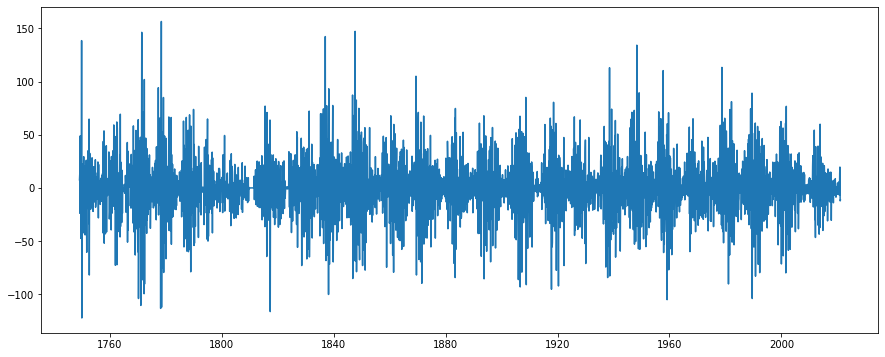

In [ ]:
#Melakukan differencing pertama
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1)

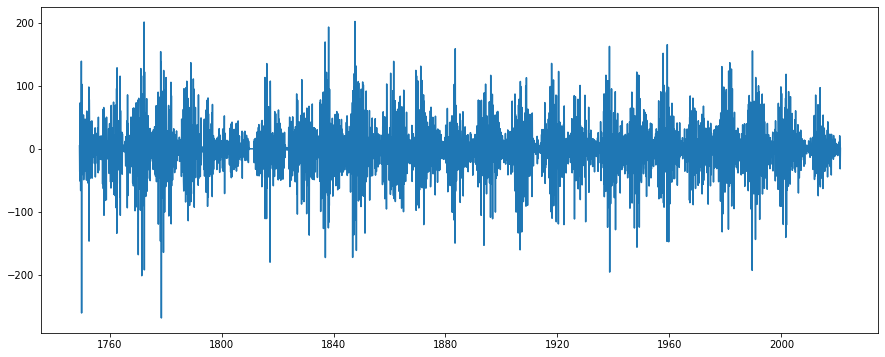

In [ ]:
#Melakukan differencing pertama
ts_diff_3 = ts_diff_2 - ts_diff_2.shift()
ts_diff_3 = ts_diff_3.dropna()
plt.plot(ts_diff_2)

Terlihat masih belum stasioner, boleh coba differencing sekali lagi atau coba lanjutkan ke transformasi log

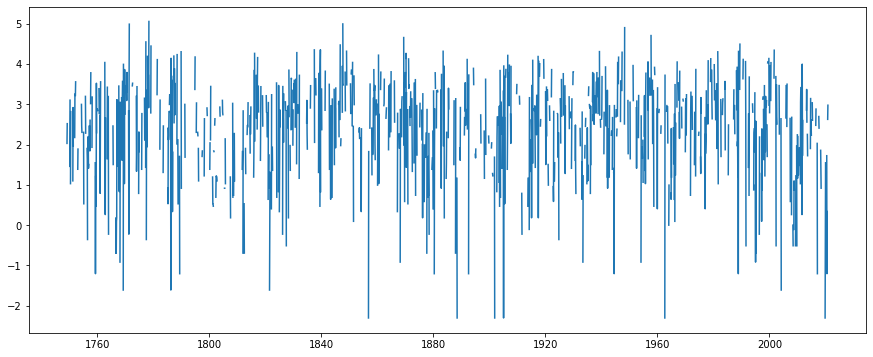

In [ ]:
#Mencoba melakukan transformasi log
ts_log_dif = np.log(ts_diff_1)
plt.plot(ts_log_dif)

Ternyata tidak lebih baik. Sekarang coba data awal yang ditransformasi log

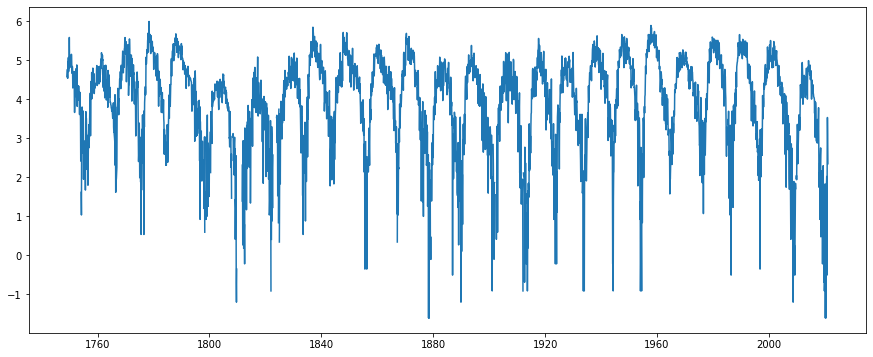

In [ ]:
#Mencoba melakukan transformasi log
ts_log = np.log(ts)
plt.plot(ts_log)

Masih belum stasioner, tetapi secara varians terlihat lebih baik. Sekarang coba data yang ini didifferencing

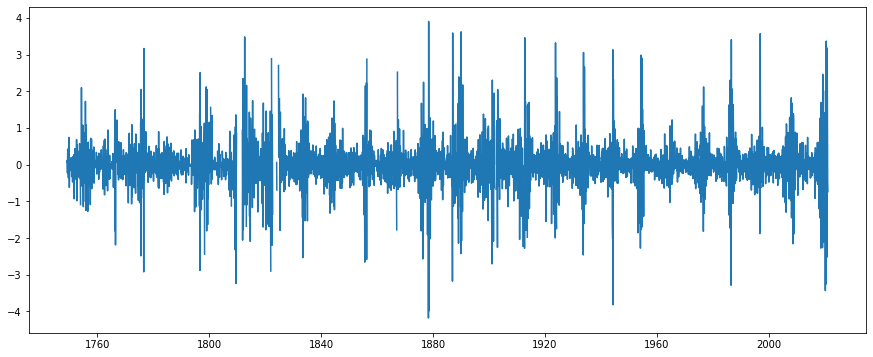

In [ ]:
#Melakukan differencing setelah transform log
ts_log_1 = ts_log - ts_log.shift()
ts_log_1 = ts_log_1.dropna()
plt.plot(ts_log_1)

## Sepertinya sudah stasioner, sekarang coba uji Dickey-Fuller supaya lebih meyakinkan

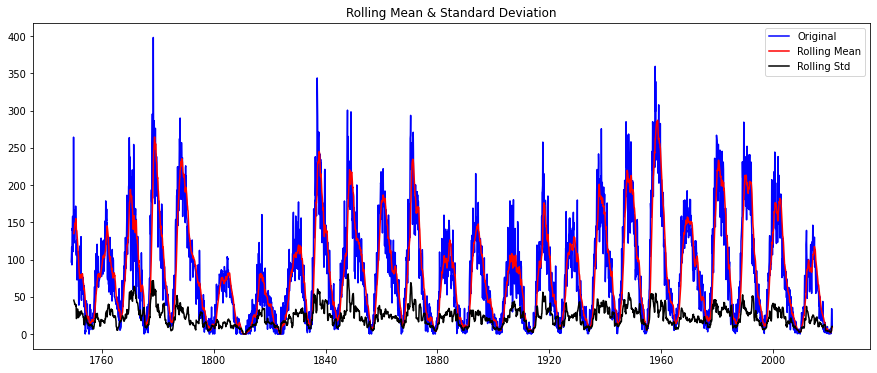

Results of Dickey-Fuller Test:
Test Statistic                -1.049705e+01
p-value                        1.108552e-18
#Lags Used                     2.800000e+01
Number of Observations Used    3.236000e+03
Critical Value (1%)           -3.432372e+00
Critical Value (5%)           -2.862434e+00
Critical Value (10%)          -2.567246e+00
dtype: float64


In [ ]:
test_stationarity(ts.dropna())

Jika menggunakan alpha 10%, nilai p-value < alpha sehingga sudah memenuhi syarat stasioner. Jadi untuk mempersingkat waktu kita gunakan hasil ini dengan tingkat kepercayaan 90%.

# ACF & PACF

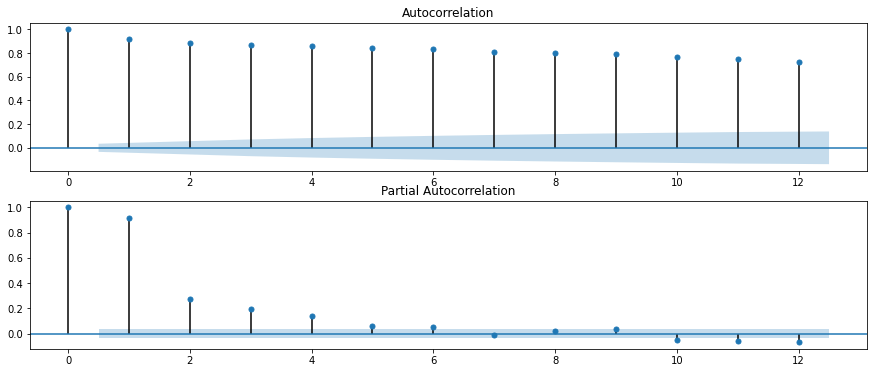

In [ ]:
plt.figure()
plt.subplot(211)
plot_acf(ts, ax=plt.gca(), lags=12)
plt.subplot(212)
plot_pacf(ts, ax=plt.gca(), lags=12)
plt.show()

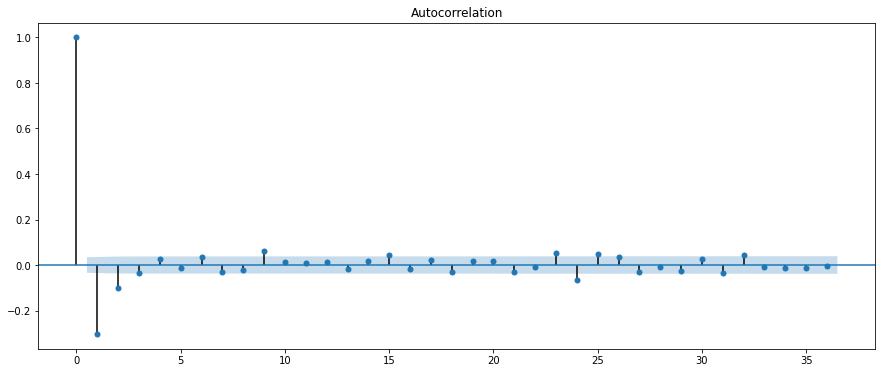

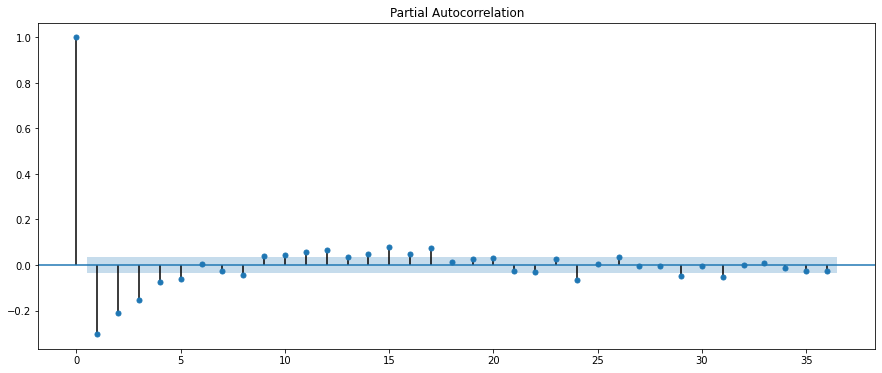

In [ ]:
# Difference Method
plot_acf(np.diff(ts.values))
plot_pacf(np.diff(ts.values))
plt.show()

Terlihat bahwa keduanya cut off lag ke-1, lalu 4, lalu 8, ini menunjukkan pola seasonal (musiman) dengan orde 4. Sehingga kemungkinan modelnya


1. ARIMA(1, 1, 1) (p=1, d=1 karena sudah differencing sekali, q=1)
2. SARIMA(1, 1, 1)4, karena mencapai max/min tiap 4

Dan kombinasi lainnya dengan p=[1, 4, 8], d=1, q=[1, 4, 8]

## Membuat model ARIMA

In [ ]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)               #data trainingnya 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))


In [ ]:
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=76.707
ARIMA(0, 0, 1) RMSE=49.512
ARIMA(0, 0, 2) RMSE=39.667
ARIMA(0, 1, 0) RMSE=26.347
ARIMA(0, 1, 1) RMSE=24.833
ARIMA(0, 1, 2) RMSE=24.617
ARIMA(1, 0, 0) RMSE=26.046
ARIMA(1, 0, 1) RMSE=24.729
ARIMA(1, 0, 2) RMSE=24.535
ARIMA(1, 1, 0) RMSE=25.459
ARIMA(1, 1, 1) RMSE=24.667
ARIMA(1, 1, 2) RMSE=24.629
ARIMA(2, 0, 0) RMSE=25.268
ARIMA(2, 0, 1) RMSE=24.581
ARIMA(2, 0, 2) RMSE=24.543
ARIMA(2, 1, 0) RMSE=24.783
ARIMA(2, 1, 1) RMSE=24.611
ARIMA(2, 1, 2) RMSE=24.489
Best ARIMA(2, 1, 2) RMSE=24.489


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


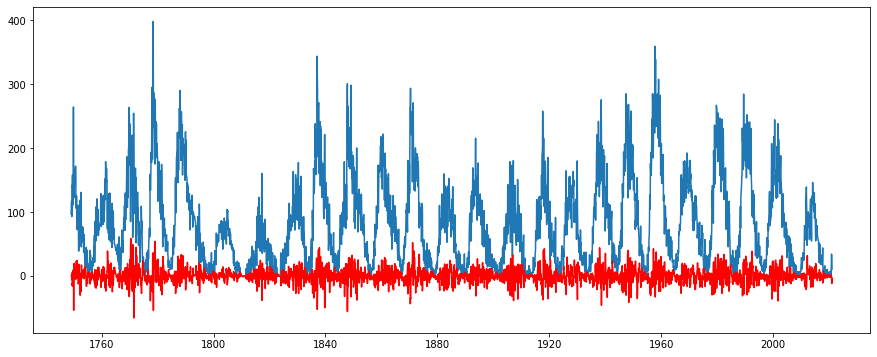

In [ ]:
model_ARIMA = ARIMA(ts, order=(2,1,2))
results_ARIMA = model_ARIMA.fit(disp=-1)
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts)             
plt.plot(predictions_ARIMA_diff, color='red')               #fitting dengan data yang udah difference sekali dan log

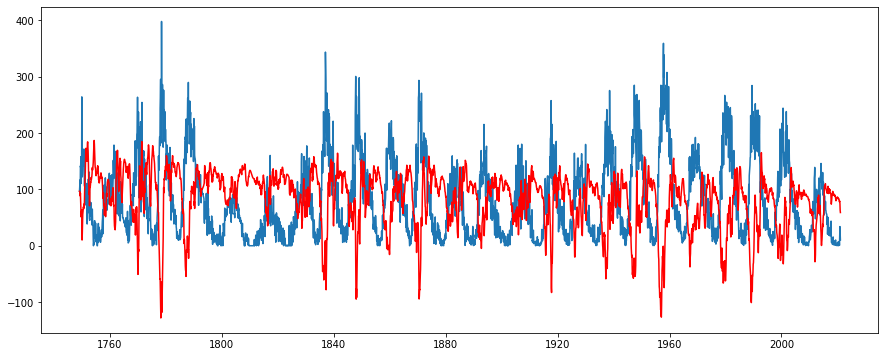

In [ ]:
predictions_ARIMA_diff_cum_sum = predictions_ARIMA_diff.cumsum()                                
predictions_ARIMA_log = pd.Series(ts.iloc[0],index=ts.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cum_sum,fill_value=0)
plt.plot(ts)             
plt.plot(predictions_ARIMA_log, color='red')               #fitting dengan data yang ditransformasi log

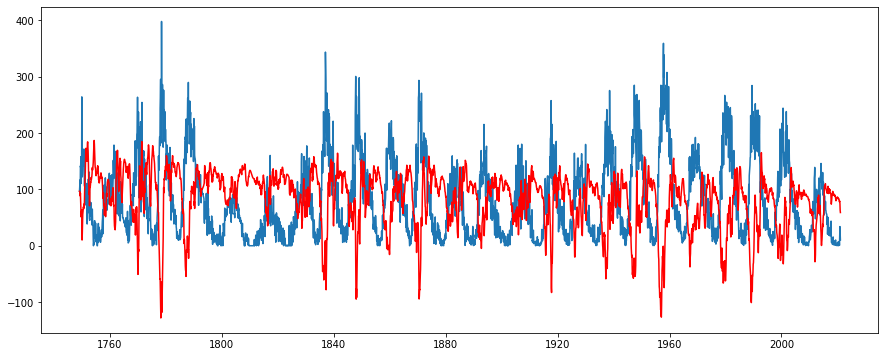

In [ ]:
predictions_ARIMA = predictions_ARIMA_log
plt.plot(ts)
plt.plot(predictions_ARIMA, color='red')                    #fitting dengan data asli

In [ ]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      ARIMA Model Results                                      
===============================================================================================
Dep. Variable:     D.Monthly Mean Total Sunspot Number   No. Observations:                 3264
Model:                                  ARIMA(2, 1, 2)   Log Likelihood              -15120.477
Method:                                        css-mle   S.D. of innovations             24.865
Date:                                 Mon, 04 Apr 2022   AIC                          30252.955
Time:                                         08:00:41   BIC                          30289.499
Sample:                                     02-28-1749   HQIC                         30266.044
                                          - 01-31-2021                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
const                                        -0.0116      0.334     -0.035      0.972      -0.667       0.643
ar.L1.D.Monthly Mean Total Sunspot Number     1.3251      0.028     46.915      0.000       1.270       1.380
ar.L2.D.Monthly Mean Total Sunspot Number    -0.3769      0.027    -14.199      0.000      -0.429      -0.325
ma.L1.D.Monthly Mean Total Sunspot Number    -1.7579      0.019    -90.731      0.000      -1.796      -1.720
ma.L2.D.Monthly Mean Total Sunspot Number     0.7977      0.018     44.056      0.000       0.762       0.833
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0967           +0.0000j            1.0967            0.0000
AR.2            2.4194           +0.0000j            2.4194            0.0000
MA.1            1.1018           -0.1989j            1.1196           -0.0284
MA.2            1.1018           +0.1989j            1.1196            0.0284
-----------------------------------------------------------------------------
"""

## Kombinasi Model dengan Seasonal dan Trend

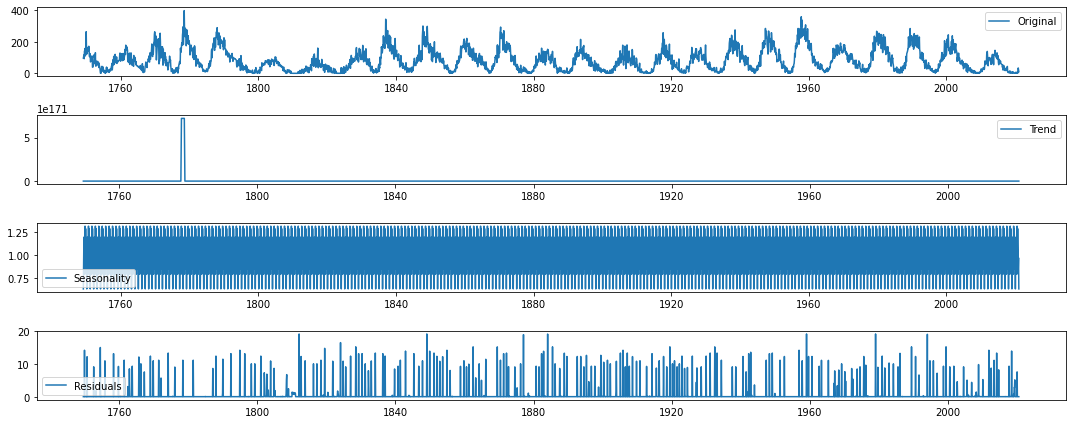

In [ ]:
decomposition = seasonal_decompose(np.exp(ts), model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [ ]:
train_size = int(len(ts) * 0.7)               #data trainingnya 70%
train, test = ts[:train_size], ts[train_size:]
history = [x for x in train]
# make predictions
predictions = list()
for t in range(len(test)):
		model = SARIMAX(history, order=(1,1,1), seasonal_order=(1,1,1,4))
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])

# calculate out of sample error
rmse = sqrt(mean_squared_error(test, predictions))
print(rmse)

24.651173092264084


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


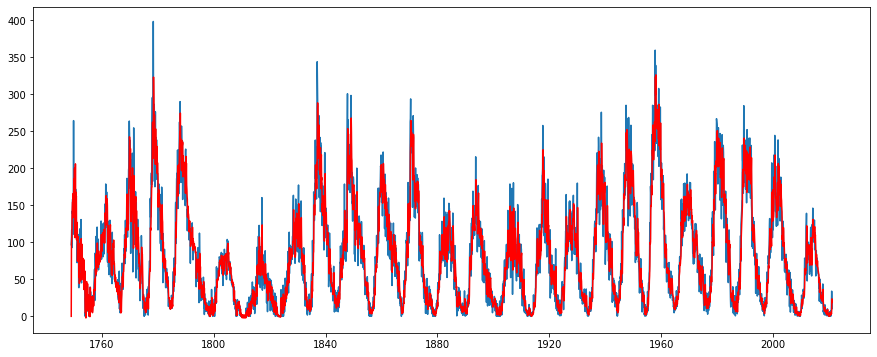

In [ ]:
#Bikin model SARIMA
model_sarima = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,4))
results_SARIMA = model_sarima.fit(disp=-1)
predictions_SARIMA_diff = pd.Series(results_SARIMA.fittedvalues,copy=True)
plt.plot(ts)             
plt.plot(predictions_SARIMA_diff, color='red')               #fitting dengan data log

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


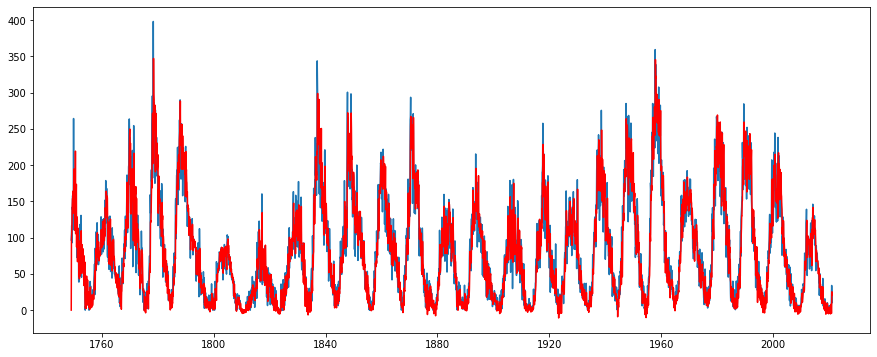

In [ ]:
#SARIMA + trend untuk data asli
model_sarima_trend = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,4), trend='t')
results_SARIMA_t = model_sarima_trend.fit(disp=-1)
predictions_SARIMA_diff_t = pd.Series(results_SARIMA_t.fittedvalues,copy=True)
plt.plot(ts)             
plt.plot(predictions_SARIMA_diff_t, color='red')               #fitting dengan data

In [ ]:
results_SARIMA_t.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   Statespace Model Results                                  
=============================================================================================
Dep. Variable:     Monthly Mean Total Sunspot Number   No. Observations:                 3265
Model:                 SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood              -15572.392
Date:                               Mon, 04 Apr 2022   AIC                          31156.784
Time:                                       12:27:02   BIC                          31193.321
Sample:                                   01-31-1749   HQIC                         31169.871
                                        - 01-31-2021                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
drift      -4.658e-06   2.29e-05     -0.203      0.839   -4.96e-05    4.03e-05
ar.L1          0.2955      0.060      4.948      0.000       0.178       0.413
ma.L1         -0.6527      0.050    -13.090      0.000      -0.750      -0.555
ar.S.L4       -0.2070      0.028     -7.285      0.000      -0.263      -0.151
ma.S.L4       -0.8675      0.017    -51.844      0.000      -0.900      -0.835
sigma2      1319.7357     38.425     34.346      0.000    1244.425    1395.046
===================================================================================
Ljung-Box (Q):                      337.08   Jarque-Bera (JB):               918.03
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.89   Skew:                             0.06
Prob(H) (two-sided):                  0.06   Kurtosis:                         5.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Membuat prediksi

In [ ]:
#dengan model ARIMA(2,0,2)
predict_dif = results_ARIMA.predict(start=144,end=156)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_log = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data lognya
  a = pred_log[i] + j
  pred_log.append(a)
predict_exp = pd.Series(np.exp(pred_log[1:]), index=predict_dif.index)  #prediksi data aslinya
print(predict_exp)

1761-01-31     2.423945e+05
1761-02-28     1.151751e+04
1761-03-31     2.277950e-06
1761-04-30     1.988178e-19
1761-05-31     5.032716e-32
1761-06-30     5.328636e-55
1761-07-31     2.745151e-83
1761-08-31    2.053422e-113
1761-09-30    3.489995e-143
1761-10-31    8.805858e-175
1761-11-30    3.397069e-203
1761-12-31    1.580028e-228
1762-01-31    5.434228e-237
Freq: M, dtype: float64


In [ ]:
#prediksi dengan SARIMA+trend
pred_2 = results_SARIMA_t.predict(start=144,end=156)
print(pred_2)

1761-01-31    111.788386
1761-02-28    102.303212
1761-03-31    141.395528
1761-04-30    135.838520
1761-05-31    126.869550
1761-06-30    144.282881
1761-07-31    164.101685
1761-08-31    160.924907
1761-09-30    155.493809
1761-10-31    157.424239
1761-11-30    157.011553
1761-12-31    154.707017
1762-01-31    117.291179
Freq: M, dtype: float64
